In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
sns.set()  # Used for styling
plt.style.use('ggplot') # Used for styling

# Import Data From CSV

In [2]:
advert = pd.read_csv('Advertising.csv')

In [3]:
advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
advert = advert.drop(columns = ['Unnamed: 0'], axis = 1)

In [5]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advert.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Plot correlations among predictive and target variable

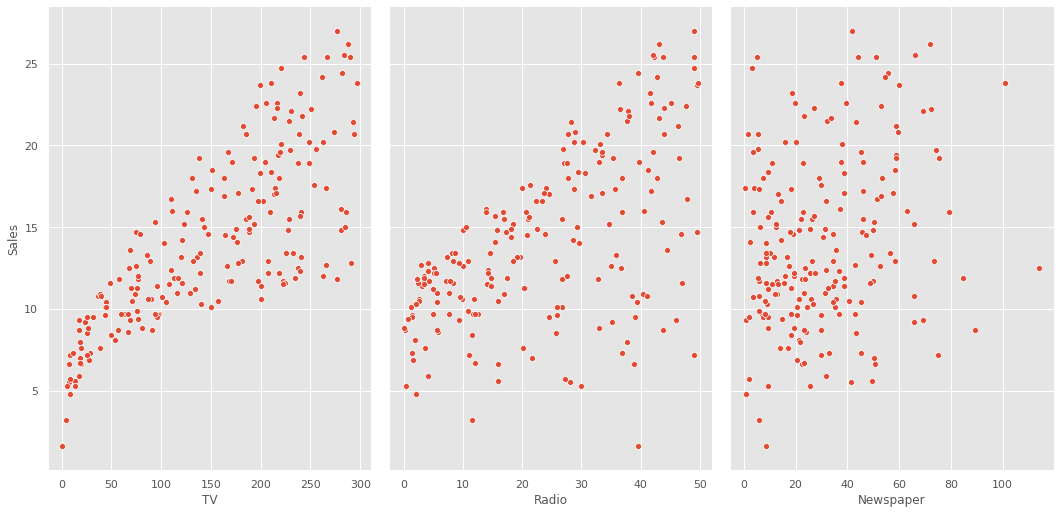

In [7]:
sns.pairplot(advert, x_vars=["TV", "Radio", "Newspaper"], y_vars = ["Sales"], height = 7, aspect=0.7)

# Build models using Linear Regressions

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X = advert[["TV", "Radio", "Newspaper"]]
y = advert.Sales

In [10]:
lm1 = LinearRegression()
lm1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(lm1.intercept_)

2.9388893694594085


In [12]:
print(lm1.coef_)

[ 0.04576465  0.18853002 -0.00103749]


In [13]:
list(zip(["TV", "Radio", "Newspaper"], lm1.coef_))

[('TV', 0.045764645455397615),
 ('Radio', 0.18853001691820456),
 ('Newspaper', -0.0010374930424763272)]

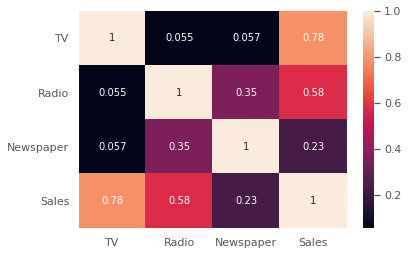

In [14]:
sns.heatmap(advert.corr(), annot = True)

# Calculate Model Accuracy

In [15]:
from sklearn.metrics import r2_score

In [16]:
lm2 = LinearRegression().fit(X[["TV", "Radio"]], y)
y_pred_lm2 = lm2.predict(X[["TV", "Radio"]])
print("R^2 Score: ", r2_score(y_pred_lm2, y))

R^2 Score:  0.8854141813245442


In [17]:
lm3= LinearRegression().fit(X[["TV", "Radio", "Newspaper"]], y)
y_pred_lm3 = lm3.predict(X[["TV", "Radio", "Newspaper"]])
print("R^2 Score: ", r2_score(y_pred_lm3, y))

R^2 Score:  0.8854345262449441


# Split Train - Test Set & Create New Models

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [26]:
X = advert[["TV", "Radio", "Newspaper"]]
y = advert.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1)

lm4 = LinearRegression().fit(X_train, y_train)
y_pred_lm4 = lm4.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lm4)))
print("R^2: ", r2_score(y_pred_lm4, y_test))

RMSE:  1.404651423032895
R^2:  0.908443167758155


In [27]:
X = advert[["TV", "Radio"]]
y = advert.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1)

lm5 = LinearRegression().fit(X_train, y_train)
y_pred_lm5 = lm5.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lm5)))
print("R^2: ", r2_score(y_pred_lm5, y_test))

RMSE:  1.3879034699382886
R^2:  0.9110339195342406


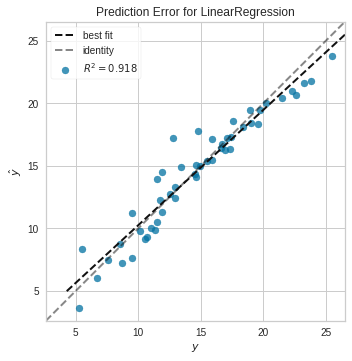

In [28]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

vis = PredictionError(lm5).fit(X_train, y_train)
vis.score(X_test, y_test)
vis.poof()

# Interaction Effect (Synergy)

In [29]:
advert['interaction'] = advert['TV'] * advert['Radio']
X = advert[["TV", "Radio", "interaction"]]
y = advert.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1)

lm6 = LinearRegression().fit(X_train, y_train)
y_pred_lm6 = lm6.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lm6)))
print("R^2: ", r2_score(y_pred_lm6, y_test))

RMSE:  0.7011871137164325
R^2:  0.9782781104092464


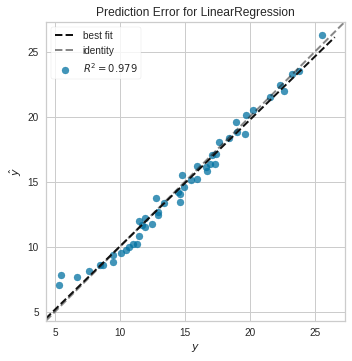

In [31]:
vis = PredictionError(lm6).fit(X_train, y_train)
vis.score(X_test, y_test)
vis.poof()